## Exploratory data analysis (EDA)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Eluvio_DS_Challenge.csv')

In [3]:
df.shape

(509236, 8)

In [4]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [5]:
df.date_created = pd.to_datetime(df.date_created)

In [6]:
# df.time_created = pd.to_datetime(df.time_created)
df['time_created2'] = pd.to_datetime(df.time_created, unit='s')

In [7]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,time_created2
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008-01-25 03:34:06
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008-01-25 03:34:35
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008-01-25 03:42:03
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008-01-25 03:54:50
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008-01-25 15:25:20


In [8]:
df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


**down_votes** are all 0, a useless column, consider **dropping** it.

In [9]:
df.describe(include='object')

,title,author,category
count,509236,509236,509236
unique,500720,85838,1
top,Brutality of Syrian Rebels Posing Dilemma in West,davidreiss666,worldnews
freq,6,8897,509236


Only one category: worldnews.

In [10]:
df.describe(include='datetime')

,date_created,time_created2
count,509236,509236
unique,3223,508329
top,2015-11-24 00:00:00,2015-05-30 05:34:48
freq,458,4
first,2008-01-25 00:00:00,2008-01-25 03:34:06
last,2016-11-22 00:00:00,2016-11-22 12:22:26


#### How many contents for each author

In [11]:
df_author_content_cnt = df[['category', 'author']].groupby('author').count().sort_values('category', ascending=False)#.plot(kind='box', vert=False)
df_author_content_cnt.columns=['content_cnt']

In [12]:
# df_author_content_cnt.content_cnt.value_counts()

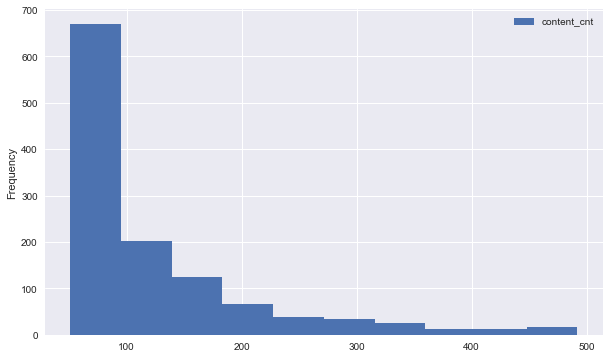

In [13]:
df_author_content_cnt[(df_author_content_cnt.content_cnt<=500) & (df_author_content_cnt.content_cnt>50)].plot(kind='hist', figsize=(10,6))

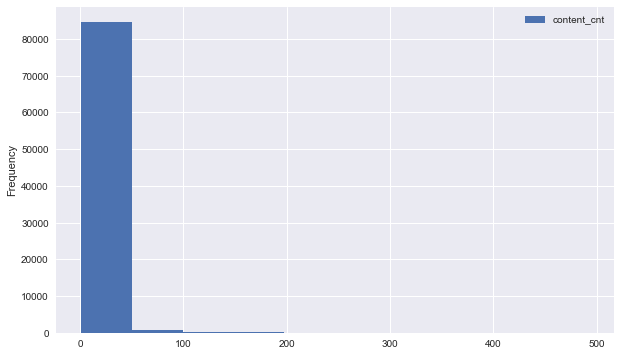

In [14]:
df_author_content_cnt[(df_author_content_cnt.content_cnt<=500)].plot(kind='hist', figsize=(10,6))

Most of the authors have less than 10 contents, while some may have extremely more.

Add a column to indicate nth content for each author.

In [15]:
# sort by time
df.sort_values(by=['time_created'], inplace=True)
# nth content by each author
df['nth_content'] = df.groupby(['author']).cumcount()+1
df.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,time_created2,nth_content
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008-01-25 03:34:06,1
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008-01-25 03:34:35,2
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008-01-25 03:42:03,3
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008-01-25 03:54:50,1
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008-01-25 15:25:20,1
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews,2008-01-25 19:04:49,1
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews,2008-01-25 19:30:38,1
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews,2008-01-28 16:11:02,1
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews,2008-01-28 22:13:16,2
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews,2008-01-29 19:44:29,1


In [16]:
for k, title in enumerate(df[['title']].sample(20, random_state=2019).title):
    print(k, ':', title)

0 : Iran launches mass production of new surface-to-air missiles
1 : Burkina Faso traders riot over lootings: Merchants set fire to ruling party s headquarters after officials fail to stop soldiers ransacking their shops

2 : Drought, hail, cold conspire to turn European wine grape harvest in worst in half a century
3 : U.S. travel alert adds Nogales, Mexico
4 : Peru state energy company reports Amazon oil spill
5 : Denmark Reintroduces Border Controls
6 : Ukrainian rebels free four OSCE hostages, four still in captivity
7 : Signs of Changes Taking Hold in Electronics Factories in China

8 : Turnbull, Morrison to speak on tax reform
9 : Panama Papers: Pakistan PM Sharif under fire over offshore accounts
10 : Where is the Muslim world outrage over DARFUR?
11 : China eyes artificial intelligence for ‘fire-and-forget’ cruise missiles | China is already a global leader in the field of using artificial intelligence in missiles, says representative of space programme contractor
12 : WHO: 7 m

Note the variation in **length of titles**, might be a potential feature.

#### Some exploration towards over_18 contents

In [17]:
df.over_18.value_counts()

False    508916
True        320
Name: over_18, dtype: int64

In [18]:
for text in df[df.over_18==True].sample(20, random_state=2019).title:
    print(text)

International Go-Topless Day sees women bare breasts in 50 cities
NSFW: Syrian Internet Restored, Dramatic Footage Emerges [VIDEO]
 Muslim, let s get naked : Ukraine-based activist group Femen Opens First Office Abroad in Paris. For the opening, the women ran half-naked through a predominantly Muslim neighborhood in the French capital.
In pictures: Gaza Massacre (Graphic!  possibly NSFW)
Footage suggests Egypt protesters shot at - NSFW
Tragic story - How the Thai army deals with deserters. Warning - graphic pictures inside.
IDF kills young Palestinian boy. Potentially NSFW.
Tibetan in Delhi Sets Self Alight to Protest Chinese Leader s Visit - NYTimes.com
[NSFL] Australian child molester Peter Scully faces death penalty in Philippines - Scully  filmed his torture and rape of young girls as he made them dig their own graves  and  laughed, joked and acted nonchalant about his alleged crimes 
2,500 people killed in Bangladesh by the Govt. on May 6, 2013, however, the World doesn t know abo

Many of them have words like NSFW, NSFL, NPR, indicating why they have been classified as over_18. Some in the beginning, some in the ending. Some in the parenthesis, some not.
- Indication for later pre-processing: remove links, words mentioned above, contents between a pair of parenthesis() or square brackets[]

In [19]:
# whether an author keep writing over_18 contents
df[df.over_18==True].drop_duplicates(subset=['author'], keep='last')[['author', 'nth_content']]

,author,nth_content
1885,pressed,1
12163,stesch,76
12699,cup,16
22937,pets_or_meat,38
26093,yellowcakewalk,25
35986,timmythedyingboy,1
36849,sg42,1
37176,cactusrex,6
38831,alllie,752
40853,m4caque,8


In [20]:
# # check some authors with some number of articles, it turns out that authors won't keep having over_18 content.
# # Plus, 320 over_18 contents for 285 authors, re-prove it.
# df[df.author=='NinjaDiscoJesus']

#### Number of contents over time

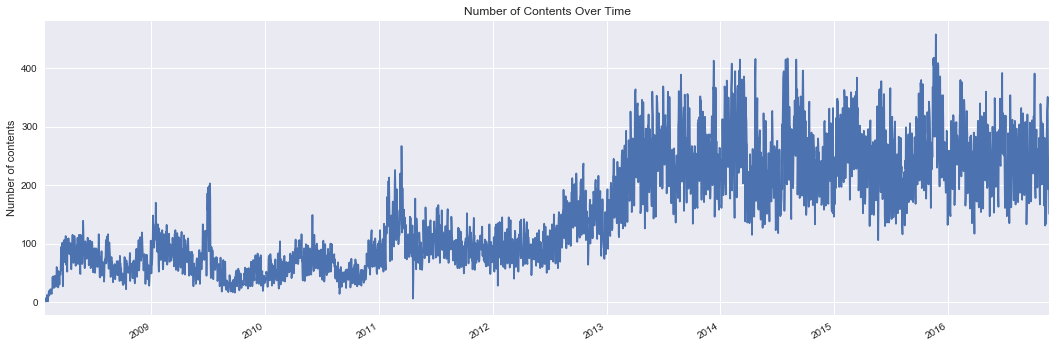

In [21]:
df[['date_created', 'time_created']].groupby('date_created').count().plot(figsize=(18,6), legend=None)
plt.title('Number of Contents Over Time')
plt.ylabel('Number of contents')
plt.xlabel(None)
plt.show()

#### Number of authors over time

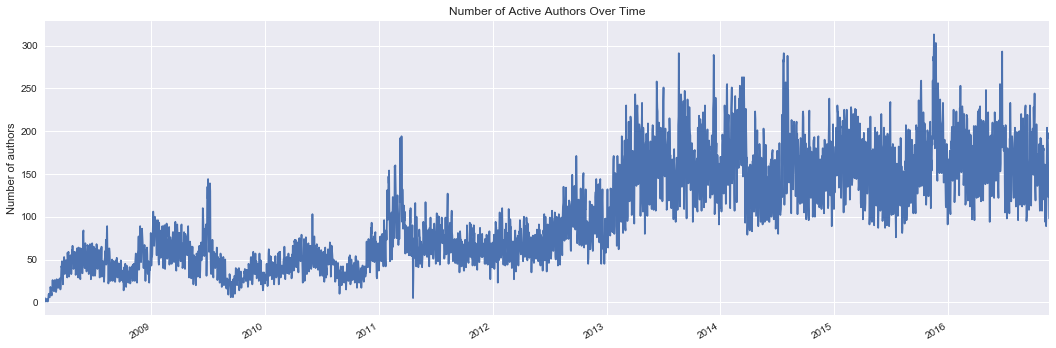

In [22]:
df[['date_created', 'author']].drop_duplicates(subset=['author', 'date_created']).groupby('date_created').count().plot(figsize=(18,6), legend=None)
plt.title('Number of Active Authors Over Time')
plt.ylabel('Number of authors')
plt.xlabel(None)
plt.show()

**Some indication:**
- Similar trend for number of contents and authors.
- The numbers are not stable. They increase sharply at several points:
    - Mid 2009
    - Early 2012
    - Mid 2014
    - Late 2016
- After each sharp increase, the number usually **drop back** to the average point within 2 or 3 month. This makes me think of some non-lasting marketing plans.
- Year **2013** seem like a breaking point: the number doubled and remained. There should be a huge change between late 2012 and early 2013.

#### Number of up-votes over time

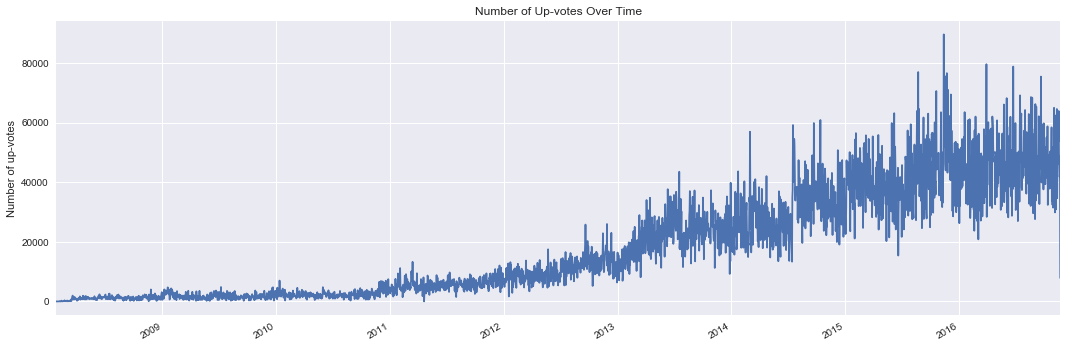

In [23]:
df[['date_created', 'up_votes']].groupby('date_created').sum().plot(figsize=(18,6), legend=None)
plt.title('Number of Up-votes Over Time')
plt.ylabel('Number of up-votes')
plt.xlabel(None)
plt.show()

This is a totally different trend. If we think of the dataset is generated from a **UGC (User Generated Content) platform** like Quora or Medium, where there are **two types of users: authors and readers**. The number of contents and authors could represent number of authors, while the number of up-votes could represent the number of readers. As a platform manager, we **want both numbers to increase**.
- Despite the fluctuation, the number of readers **keeps growing**.

#### Distribution of up-votes

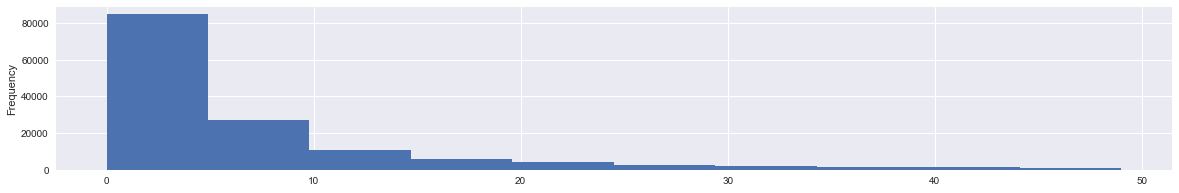

In [24]:
df[(df.nth_content <= 5) & (df.up_votes < 50)].up_votes.plot(kind='hist', figsize=(20,3))